In [1]:
from utils import *

In [44]:
# check if AB, AC in clockwise order or colinear
def ccw(A,B,C):
    if (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0]):
        return 1
    if (C[1]-A[1]) * (B[0]-A[0]) == (B[1]-A[1]) * (C[0]-A[0]):
        return 0
    return -1

# check if C is between A and B
def betwn(A,B,C):
    return C[0] > min(A[0],B[0]) and C[0] < max(A[0],B[0])

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    #print(ccw(A,C,D),ccw(B,C,D), ccw(A,B,C), ccw(A,B,D))
    if ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D):
        return True
    if ccw(A,B,C)==0 and betwn(A,B,C):
        return True
    if ccw(A,B,D)==0 and betwn(A,B,D):
        return True
    if ccw(A,C,D)==0 and betwn(C,D,A):
        return True
    if ccw(B,C,D)==0 and betwn(C,D,B):
        return True
    return False


In [30]:
def convertList2Matrix(link_list, n_vx):
    links = np.zeros([n_vx, n_vx])
    for link in link_list:
        links[link[0]][link[1]] = links[link[1]][link[0]] = 1
    return links

In [45]:
def generateLinksBoran(vxs, thre=[140,240], mode=0):
    # mode: 
    #   0: delete both edges if cross, 
    #   1: delete the second edge if cross
    #   2: plot all edges once in range
    n_vx = len(vxs)
    links = np.zeros([n_vx, n_vx])
    dist_matrix = distance_matrix(vxs, vxs)
    for i in range(n_vx):
        for j in range(i+1, n_vx):
            if thre[0] <= dist_matrix[i][j] <= thre[1]:
                links[i][j]=links[j][i]=1
    link_list = convertMatrix2List(links)
    n_links = len(link_list)
    del_idx=[]
    if mode == 0:
        for i in range(n_links):
            for j in range(i+1, n_links):
                if link_list[i][0] not in [link_list[j][0],link_list[j][1]] and link_list[i][1] not in [link_list[j][0],link_list[j][1]]:
                    if intersect(vxs[link_list[i][0]],vxs[link_list[i][1]],vxs[link_list[j][0]],vxs[link_list[j][1]]):
                        del_idx.extend([i,j])
    elif mode == 1:
        for i in range(n_links):
            if i not in del_idx:
                for j in range(i+1, n_links):
                    if j not in del_idx:
                        if link_list[i][0] not in [link_list[j][0],link_list[j][1]] and link_list[i][1] not in [link_list[j][0],link_list[j][1]]:
                            if intersect(vxs[link_list[i][0]],vxs[link_list[i][1]],vxs[link_list[j][0]],vxs[link_list[j][1]]):
                                del_idx.extend([j])
    link_list = [ link_list[x] for x in range(n_links) if x not in del_idx ]
    return convertList2Matrix(link_list, n_vx)

    

In [24]:
def simRandD(size=100, d=5, n=20):
    points = []
    i = 0
    c = 0
    while i < n and c < 20:
        t_vx = np.random.rand(2) * size
        t_flag = 1
        for vx in points:
            if np.linalg.norm(t_vx - vx) < d:
                t_flag = 0
                c += 1
                break
        if t_flag == 1:
            points.append(t_vx)
            i += 1
            c = 0
    return np.array(points)

In [49]:
def generateLinks(vxs, img=None, thre=[100, 200], plot=1, mode=0):
    # first step
    n_vx = len(vxs)
    links = np.zeros([n_vx, n_vx])
    if n_vx <= 4:
        return links
    tri = Delaunay(vxs)
    if mode ==0:
        small_tri = [
            x
            for x in tri.simplices
            if thre[0] <= np.linalg.norm(vxs[x[0]] - vxs[x[1]]) <= thre[1]
            and thre[0] <= np.linalg.norm(vxs[x[2]] - vxs[x[1]]) <= thre[1]
            and thre[0] <= np.linalg.norm(vxs[x[0]] - vxs[x[2]]) <= thre[1]
        ]
        for x in small_tri:
            links[x[0]][x[1]] = links[x[1]][x[0]] = links[x[0]][x[2]] = links[x[2]][x[0]] = links[x[1]][x[2]] = links[x[2]][x[1]] = 1
    elif mode ==1:
        for x in tri.simplices:
            if thre[0] <= np.linalg.norm(vxs[x[0]] - vxs[x[1]]) <= thre[1]:
                links[x[0]][x[1]] = links[x[1]][x[0]]=1
            if thre[0] <= np.linalg.norm(vxs[x[2]] - vxs[x[1]]) <= thre[1]:
                links[x[2]][x[1]] = links[x[1]][x[2]]=1
            if thre[0] <= np.linalg.norm(vxs[x[0]] - vxs[x[2]]) <= thre[1]:
                links[x[0]][x[2]] = links[x[2]][x[0]]=1
    if plot:
        plt.figure(figsize=[10, 10])
        if img:
            plt.imshow(img)
        if small_tri:
            plt.triplot(vxs[:, 0], vxs[:, 1], small_tri, c="g")
        plt.plot(
            vxs[:, 0],
            vxs[:, 1],
            ".",
            markerfacecolor="purple",
            markersize=10,
        )
        ax = plt.gca()
        ax.set_aspect("equal", adjustable="box")
    return links

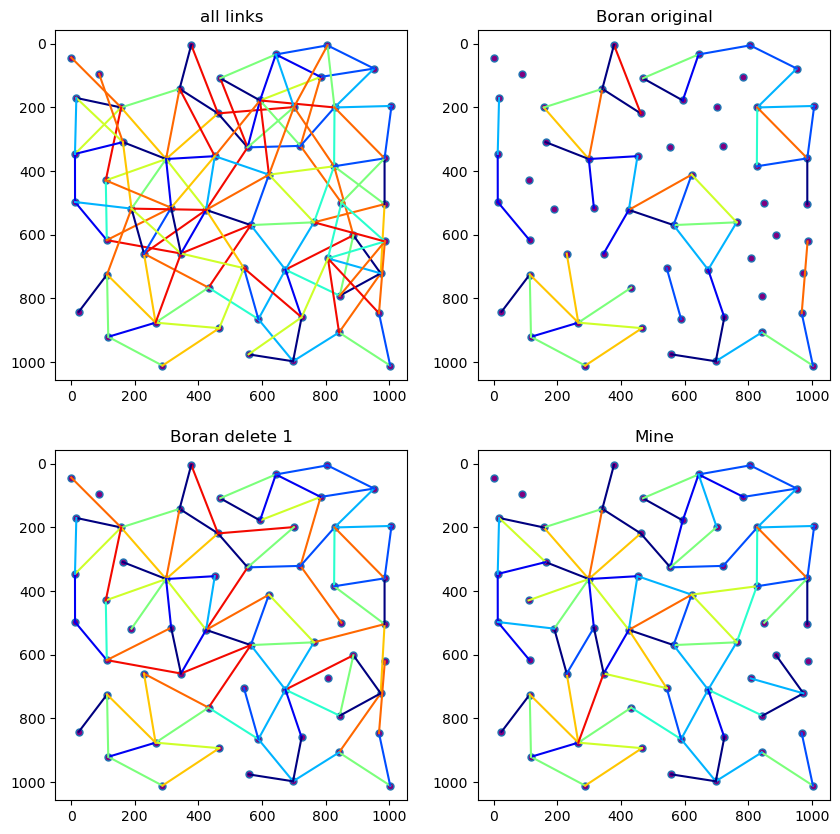

In [51]:
thre = [140, 240]
np.random.seed(1027)
vxs = simRandD(64*16,d=100,n=60)
links = generateLinks(vxs, thre=thre, plot=0, mode=1)
links1 = generateLinksBoran(vxs, mode=0)
links2 = generateLinksBoran(vxs, mode=1)
links0 = generateLinksBoran(vxs, mode=2)
plt.subplots(2,2,figsize=[10,10])
titles = ["all links", "Boran original", "Boran delete 1", "Mine"]
for idx, lks in enumerate([links0, links1, links2, links]):
    plt.subplot(2,2, idx+1)
    visualize(vxs,lks,p_size=1, thre=thre)
    plt.title(titles[idx])

In [ ]:
def performances(test, gt):
    correct = test[test==gt]
    wrong = test[test!=gt]
    FP = sum(wrong)/2
    TP = sum(correct)/2
    TN = len(correct)/2-TP
    FN = len(wrong)/2-FP
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    return(accuracy, precision, recall)

## Test perfect 2D and 1Ds with different parameters

## Test EM results

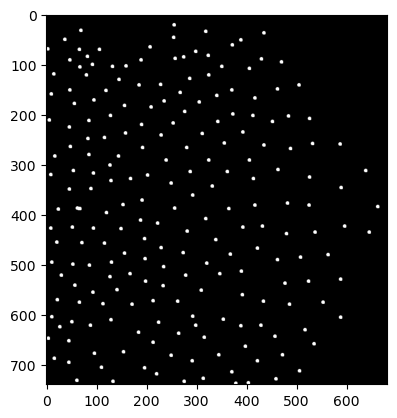

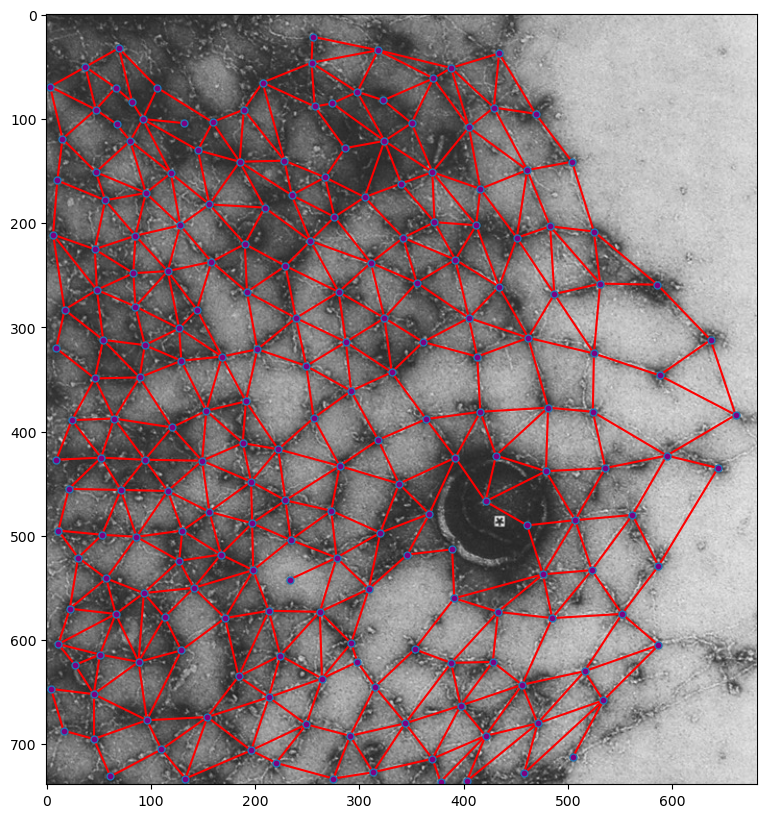

In [52]:
em = cv2.imread("../data/em/2.png", -1)
gt = cv2.imread("../data/em/2_marked.png", -1)
plt.imshow(gt[:,:,2]-gt[:,:,1])
marker = gt[:,:,2]-gt[:,:,1]
contours = cv2.findContours(marker.astype(np.uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
contour_centers = np.zeros([len(contours)-1,2])
for i in range(len(contours)-1):
    contour_centers[i] = contours[i+1].reshape([-1,2]).mean(axis=0)

vxs=contour_centers
n_vx = len(vxs)
gt_sp = cv2.imread("../data/em/2_marked_final.png", -1)
plt.figure(figsize=[10,10])
plt.imshow(em)
marker_sp=gt_sp[:,:,1]-gt_sp[:,:,0]
links = np.zeros([n_vx, n_vx])
close_mid=np.zeros(marker_sp.T.shape)
for i in range(n_vx):
    close_mid[vxs[i][0].astype(int),vxs[i][1].astype(int)] = 1

close_mid = fftconvolve(close_mid, np.ones([10,10]), mode='same')

dist = distance_matrix(vxs, vxs)
for i in range(n_vx):
    for j in range(i+1,n_vx):
        if dist[i][j] < 110:
            if sum_line_cnct(marker_sp.T, vxs[i].astype(int),vxs[j].astype(int))>=dist[i][j]*0.7:
                if sum_line_cnt(close_mid, vxs[i].astype(int),vxs[j].astype(int))[0] <3:
                    links[i,j]=links[j][i]=1
                    plt.plot([vxs[i][0],vxs[j][0]],[vxs[i][1],vxs[j][1]], color="r")
                #else:
                #    plt.plot([vxs[i][0],vxs[j+1][0]],[vxs[i][1],vxs[j+1][1]], color="b")

plt.plot(
    contour_centers[:, 0],
    contour_centers[:, 1],
    ".",
    markerfacecolor="purple",
    markersize=10,
    )

1

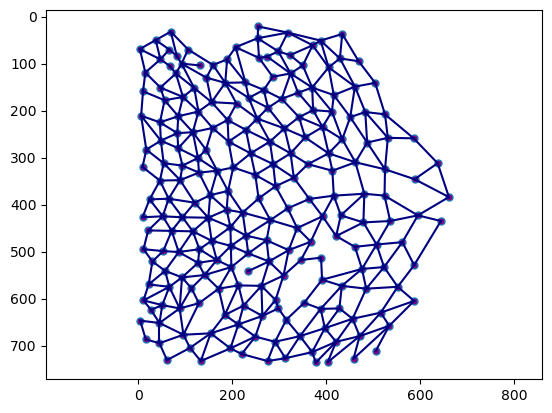

In [55]:
visualize(vxs, links, p_size=1, thre=thre)

In [56]:
dist = distance_matrix(vxs, vxs)
dists =[ dist[x[0]][x[1]] for x in convertMatrix2List(links) ]



In [58]:
[np.min(dists),np.max(dists)]

[17.26267650163207, 109.9317970379817]

0.013000249862670898
24.96688961982727
11.662850618362427
0.02899909019470215


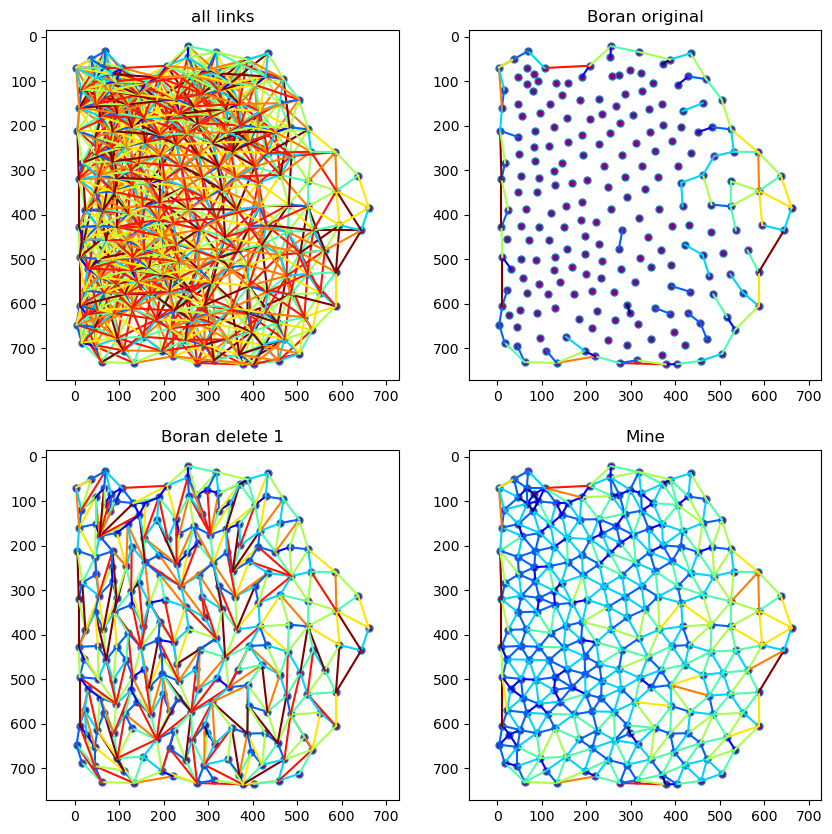

In [60]:
import time
thre = [15, 110]

start = time.time()
links_d = generateLinks(vxs, thre=thre, plot=0, mode=1)
end = time.time()
print(end - start)
start = time.time()
links1 = generateLinksBoran(vxs, thre=thre, mode=0)
end = time.time()
print(end - start)
start = time.time()
links2 = generateLinksBoran(vxs, thre=thre, mode=1)
end = time.time()
print(end - start)

start = time.time()
links0 = generateLinksBoran(vxs, thre=thre, mode=2)
end = time.time()
print(end - start)

plt.subplots(2,2,figsize=[10,10])
titles = ["all links", "Boran original", "Boran delete 1", "Mine"]
for idx, lks in enumerate([links0, links1, links2, links_d]):
    plt.subplot(2,2, idx+1)
    visualize(vxs,lks,p_size=1, thre=thre)
    plt.title(titles[idx])